# Setup

In [2]:
# !pip install --upgrade gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
from sklearn.decomposition import LatentDirichletAllocation

In [47]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

In [5]:
#!pip install mglearn

In [6]:
import mglearn
from collections import Counter

In [7]:
from textblob import TextBlob

In [180]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# Clean Data

In [8]:
df = pd.read_csv("data/Death_Row_Data.csv", encoding = "latin1")

In [9]:
words = df['Last Statement']
print("Number of executions: {}".format(len(words)))

Number of executions: 549


In [10]:
words = words.dropna()
print("Number of statements: {}".format(len(words)))

Number of statements: 447


## Extra symbols

Webscraping gave me none english characters. clean up text

In [11]:
words = [doc.replace("\x99","") for doc in words]

In [12]:
words = [doc.replace("\x98","") for doc in words]

In [13]:
words = [doc.replace("\x93","") for doc in words]

In [14]:
words = [doc.replace("\x80","") for doc in words]

In [15]:
words = [doc.replace("\x9d","") for doc in words]

In [16]:
words = [doc.replace("\x9c","") for doc in words]

In [17]:
words = [doc.replace("â","") for doc in words]

In [18]:
words = [doc.replace("\'","") for doc in words]

In [19]:
words = [doc.replace("\n","") for doc in words]

In [20]:
words = [doc.replace("\r","") for doc in words]

## Drop "No statement"

In [25]:
def remove_all_values(the_list, val):
   return [value for value in the_list if value != val]

In [26]:
words = remove_all_values(words,'None')

In [27]:
words = remove_all_values(words,'None.')

In [28]:
words = remove_all_values(words,'No')

In [29]:
words = remove_all_values(words,'This offender declined to make a last statement.  ')

In [30]:
words = remove_all_values(words,'This offender declined to make a last statement.')

In [31]:
words = remove_all_values(words,'No, I have no final statement. ')

In [32]:
words = remove_all_values(words,'No last statement.')

In [33]:
print("Number of statements: {}".format(len(words)))

Number of statements: 436


## Length of statements

In [34]:
#checking length of statements

lengths = []
for doc in words:
    lengths.append(len(doc.split()))
    if len(doc.split())<=4:
        print(doc)
lengths.sort()
Counter(lengths)

I love you Israel. 
 Bye, Im Ready. 
 Profanity directed toward staff.  
 Santajaib Singh Ji.  
Goodbye.
Yes, I do.
Ill see you.
Peace.
High Flight (aviation poem)
Thanked his family.
Im ready, Warden.


Counter({1: 2,
         3: 6,
         4: 3,
         5: 3,
         6: 2,
         7: 4,
         8: 5,
         9: 2,
         10: 3,
         11: 4,
         12: 3,
         13: 4,
         14: 5,
         15: 2,
         16: 4,
         17: 8,
         18: 3,
         19: 4,
         20: 6,
         21: 3,
         22: 4,
         23: 2,
         24: 6,
         25: 6,
         26: 1,
         27: 5,
         28: 6,
         29: 4,
         30: 2,
         31: 3,
         32: 8,
         33: 4,
         34: 2,
         35: 7,
         36: 2,
         37: 1,
         38: 1,
         39: 2,
         40: 4,
         42: 3,
         43: 4,
         44: 2,
         45: 7,
         46: 3,
         47: 3,
         48: 4,
         49: 2,
         50: 2,
         51: 2,
         52: 2,
         53: 2,
         54: 1,
         55: 1,
         56: 5,
         57: 2,
         58: 3,
         59: 1,
         60: 1,
         61: 2,
         62: 3,
         63: 2,
         64: 2,
         65: 4,


In [35]:
# create list of shorter than X words statements

words_short = list(filter(lambda x: len(x.split()) < 240, words))
print("Number of statements: {}".format(len(words_short)))

Number of statements: 405


In [36]:
words = words_short

# Sentiment of last words

In [37]:
polarity = []
subjectivity = []

for doc in words:
    state = str(doc)
    a = list(TextBlob(state).sentiment)
    polarity.append(a[0])
    subjectivity.append(a[1])

In [38]:
len(subjectivity)

405

In [171]:
def rand_jitter(arr):
    stdev = .017*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, 
           alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, 
                   norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, 
                   verts=verts, hold=hold, **kwargs)

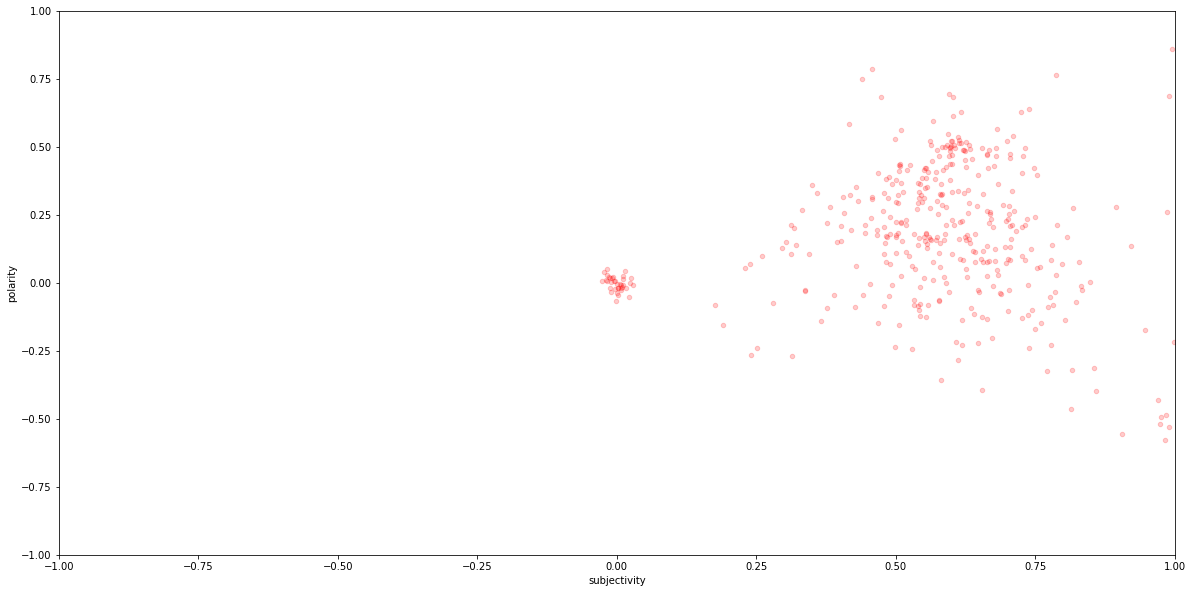

In [172]:
x = subjectivity
y = polarity

plt.figure(figsize=(20,10))
jitter(x, y, c="r", alpha=0.2)
plt.xlabel("subjectivity")
plt.ylabel("polarity")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

# Parse words

In [111]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [113]:
# Create a TfidfVectorizer for parsing/counting words
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=3, stop_words=ENGLISH_STOP_WORDS)

In [114]:
x = tfidf.fit_transform(words)

In [115]:
feature_names = tfidf.get_feature_names()
len(feature_names)

1082

In [183]:
# Create a CountVectorizer for parsing/counting words
vect = CountVectorizer(ngram_range=(1,3), min_df=3, stop_words=ENGLISH_STOP_WORDS,strip_accents='unicode')

In [184]:
x = vect.fit_transform(words)

In [185]:
feature_names = vect.get_feature_names()
len(feature_names)

1230

# LDA

In [213]:
num_topics = 3

In [214]:
lda = LatentDirichletAllocation(n_components=num_topics, max_iter = 15, random_state=0, 
                                n_jobs=-1, learning_method='batch')

In [215]:
document_topics = lda.fit_transform(x)

In [216]:
print("lda.components_.shape: {}".format(lda.components_.shape))

lda.components_.shape: (3, 1230)


## Interperate LDA

In [217]:
pyLDAvis.sklearn.prepare(lda, x, vect)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      42.973118        1       1 -0.092735  0.102996
0      37.800153        1       2 -0.091367 -0.103508
1      19.226729        1       3  0.184102  0.000512, topic_info=     Category        Freq         Term       Total  loglift  logprob
term                                                                
462   Default  135.000000           im  135.000000  30.0000  30.0000
1188  Default  143.000000         yall  143.000000  29.0000  29.0000
630   Default  511.000000         love  511.000000  28.0000  28.0000
987   Default   59.000000       strong   59.000000  27.0000  27.0000
1033  Default  220.000000        thank  220.000000  26.0000  26.0000
979   Default   41.000000         stay   41.000000  25.0000  25.0000
980   Default   34.000000  stay strong   34.000000  24.0000  24.0000
436   Default  119.000000         hope  119.000000  23.0000  23.0000
686   Default   48.000000    love yall   48.000000  22.0000  22.0000
470   Default   46.000000     im sorry   46.000000  21.0000  21.0000
245   Default  258.000000       family  258.000000  20.0000  20.0000
1075  Default   22.000000          thy   22.000000  19.0000  19.0000
936   Default  205.000000        sorry  205.000000  18.0000  18.0000
431   Default   21.000000         holy   21.000000  17.0000  17.0000
324   Default   59.000000      friends   59.000000  16.0000  16.0000
724   Default   42.000000          mom   42.000000  15.0000  15.0000
581   Default  160.000000         like  160.000000  14.0000  14.0000
120   Default   39.000000       christ   39.000000  13.0000  13.0000
13    Default   19.000000        allah   19.000000  12.0000  12.0000
99    Default   50.000000         care   50.000000  11.0000  11.0000
994   Default   35.000000      support   35.000000  10.0000  10.0000
598   Default   33.000000   like thank   33.000000   9.0000   9.0000
612   Default  108.000000         lord  108.000000   8.0000   8.0000
203   Default   86.000000         dont   86.000000   7.0000   7.0000
489   Default   75.000000        jesus   75.000000   6.0000   6.0000
42    Default   55.000000          ask   55.000000   5.0000   5.0000
316   Default   44.000000  forgiveness   44.000000   4.0000   4.0000
825   Default   66.000000        ready   66.000000   3.0000   3.0000
468   Default   23.000000     im ready   23.000000   2.0000   2.0000
898   Default   12.000000        shall   12.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
161    Topic3    4.641262    day daily    5.260039   1.5237  -6.3198
686    Topic3   29.920602    love yall   48.059738   1.1750  -4.4563
664    Topic3    7.682085     love mom    9.702049   1.4154  -5.8159
1188   Topic3   68.750574         yall  143.729578   0.9114  -3.6243
726    Topic3    8.095463     mom love   10.591466   1.3801  -5.7635
1179   Topic3    6.924930        worry    8.815475   1.4075  -5.9197
724    Topic3   22.101811          mom   42.088511   1.0048  -4.7592
630    Topic3  134.505002         love  511.650168   0.3128  -2.9532
99     Topic3   22.418381         care   50.428085   0.8382  -4.7449
962    Topic3   11.734807         soul   19.657372   1.1330  -5.3923
415    Topic3   13.585286       heaven   25.086201   1.0355  -5.2458
217    Topic3    7.802103        earth   10.624050   1.3401  -5.8004
231    Topic3    9.000978         evil   14.232377   1.1907  -5.6575
713    Topic3    9.703915        mercy   17.006724   1.0878  -5.5823
1017   Topic3   22.777391         tell  104.181687   0.1285  -4.7290
1128   Topic3   25.902552         want  147.733595  -0.0922  -4.6005
540    Topic3   11.460701    know love   25.227435   0.8599  -5.4159
357    Topic3   18.126423        going   86.786484   0.0828  -4.9574
529    Topic3   22.260689         know  188.592745  -0.4879  -4.7520
300    Topic3   17.361773      forgive  103.776646  -0.1391  -5.0005
341    Topic3   18.249697     

In [218]:
sorting = np.argsort(lda.components_,axis=1)[:,::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(num_topics),feature_names=feature_names,
                           sorting=sorting,topics_per_chunk=6,n_words=20)

topic 0       topic 1       topic 2       
--------      --------      --------      
love          love          love          
sorry         yall          thank         
im            strong        family        
know          stay          like          
hope          stay strong   god           
say           love yall     lord          
family        want          want          
dont          tell          sorry         
yall          care          know          
going         know          jesus         
life          mom           just          
tell          thy           forgive       
im sorry      holy          yes           
ready         thank         friends       
peace         god           did           
like          going         life          
want          forgive       ask           
god           allah         say           
everybody     lord          forgiveness   
warden        heaven        christ        




In [219]:
df_document_topics = pd.DataFrame(document_topics, columns=["Topic"+str(i+1) for i in range(num_topics)])
df_document_topics.head()

,Topic1,Topic2,Topic3
0,0.048055,0.907468,0.044477
1,0.433955,0.022026,0.544019
2,0.132395,0.015075,0.852530
3,0.069054,0.871234,0.059712
4,0.352933,0.004678,0.642389


In [220]:
#document_topics['Words'] = words

In [221]:
most_likely_topics = df_document_topics.idxmax(axis=1)

In [222]:
most_likely_topics.groupby(most_likely_topics).count()

Topic1    162
Topic2     54
Topic3    189
dtype: int64

## Print specific topic docs

In [127]:
topics = np.array([range(num_topics)])

In [132]:
topic_4 = np.argsort(document_topics[:,2])

for i in topic_4[:5]:
    print(i,'.'.join(words[i].split(".")[:2]))

205  Can you hear me, Chris?  The Lord is my Shepherd; I shall not want.  He makes me to lie down in green pastures; He leads me beside the still waters
98  Yes, I do. Thank you for your friendship Reverend Whiteside and thank you for your fellowship
227 The Lord is my Shepherd, I shall not want. He maketh me lie down in green pastures; He leadeth me beside the still waters, He restoreth my soul
90 Collins family, I know your not going to get the closure you are looking for tonight. I wish you the best
115  Yes, I would like to thank God for my salvation and all he has done in my life. I thank my family, loved ones, and friends


In [130]:
topic = np.argsort(document_topics[:,1])

for i in topic[:10]:
    print(i,'  ','.'.join(words[i].split(".")[:2]))

166     Tell Beth and them I am sorry, truly sorry for the pain that I caused your family.  I truly mean that too
205     Can you hear me, Chris?  The Lord is my Shepherd; I shall not want.  He makes me to lie down in green pastures; He leads me beside the still waters
98     Yes, I do. Thank you for your friendship Reverend Whiteside and thank you for your fellowship
227    The Lord is my Shepherd, I shall not want. He maketh me lie down in green pastures; He leadeth me beside the still waters, He restoreth my soul
115     Yes, I would like to thank God for my salvation and all he has done in my life. I thank my family, loved ones, and friends
282     Mama Isabel told me to tell you hello. Holy, holy, holy! Lord God Almighty! Early in the morning our song shall rise to Thee; Holy, holy, holy, merciful and mighty! God in three Persons, blessed Trinity
7    Yes, I do, Grace Kehler is that you? I have given Warden  Jones a written statement that will explain a lot more. I hope this will 